In [123]:
#import libraries
import numpy 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import matplotlib.patches as mpatches
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import scipy.stats as st 
import dtale 
import warnings
from sklearn.model_selection import StratifiedKFold 

from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')
import pandas_profiling as pdp
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve

In [124]:
fd_dlvry=pd.read_csv('../../data/Banglore_food_delivery/onlinedeliverydata.csv')

In [125]:
fd_ori=fd_dlvry.copy(deep=True)
#future uses one copy create

In [126]:
fd_dlvry.shape

(388, 55)

In [127]:
fd_dlvry.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [128]:
fd_dlvry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [129]:
# d = dtale.show(fd_dlvry)
# d.open_browser()
#we can use datle library for EDA

In [130]:
#looking data with pdp.ProfileReport 
# data = pd.read_csv('../../data/Banglore_food_delivery/onlinedeliverydata.csv')

# #Creating the Exploratory Data Analysis of our dataset
# report = pdp.ProfileReport(data, title='Pandas Profiling Report')

In [131]:
# report.widgets

In [132]:
#this library i found on google it's helpful for cleaning data,imputing value and lable encoding
import  datacleaner as dc # pip install datacleaner

dc.autoclean(fd_dlvry).head() 

In [134]:
fd_dlvry.head() 

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,0,2,3,4,2,4,12.9766,77.5993,560001,...,1,1,1,1,1,1,1,1,1,136
1,24,0,2,3,2,0,3,12.9770,77.5773,560009,...,4,4,4,4,4,4,4,4,1,135
2,22,1,2,3,2,2,3,12.9551,77.6593,560017,...,0,4,1,4,4,0,4,1,1,119
3,22,0,2,3,4,0,6,12.9473,77.5616,560019,...,4,0,1,4,4,4,4,0,1,176
4,22,1,2,3,2,2,4,12.9850,77.5533,560010,...,0,0,1,0,0,0,4,4,1,129


In [135]:
fd_ori.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [136]:
l1=(fd_ori.columns[:])
l1

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of 

In [137]:
fd_dlvry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    int32  
 2   Marital Status                             388 non-null    int32  
 3   Occupation                                 388 non-null    int32  
 4   Monthly Income                             388 non-null    int32  
 5   Educational Qualifications                 388 non-null    int32  
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [138]:
df=fd_ori.drop('Reviews',axis=1) #drop reviews because it's take NLP in future i will try it
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of 

In [139]:
%matplotlib inline

In [140]:
# we needs to back map for lable encoding 
lbl=dict()
for i in fd_ori.columns:
    if i not in  ['latitude','longitude','Pin code','Output','Reviews']:
                  lbl[i]=dict(zip(fd_ori[i].unique(), fd_dlvry[i].unique()))
    

In [141]:
lbl

{'Age': {20: 20,
  24: 24,
  22: 22,
  27: 27,
  23: 23,
  21: 21,
  28: 28,
  25: 25,
  32: 32,
  30: 30,
  31: 31,
  26: 26,
  18: 18,
  19: 19,
  33: 33,
  29: 29},
 'Gender': {'Female': 0, 'Male': 1},
 'Marital Status': {'Single': 2, 'Married': 0, 'Prefer not to say': 1},
 'Occupation': {'Student': 3,
  'Employee': 0,
  'Self Employeed': 2,
  'House wife': 1},
 'Monthly Income': {'No Income': 4,
  'Below Rs.10000': 2,
  'More than 50000': 3,
  '10001 to 25000': 0,
  '25001 to 50000': 1},
 'Educational Qualifications': {'Post Graduate': 2,
  'Graduate': 0,
  'Ph.D': 1,
  'Uneducated': 4,
  'School': 3},
 'Family size': {4: 4, 3: 3, 6: 6, 2: 2, 5: 5, 1: 1},
 'Medium (P1)': {'Food delivery apps': 1,
  'Walk-in': 2,
  'Direct call': 0,
  'Web browser': 3},
 'Medium (P2)': {' Web browser': 2, ' Direct call': 0, ' Walk-in': 1},
 'Meal(P1)': {'Breakfast': 0, 'Snacks': 3, 'Lunch': 2, 'Dinner': 1},
 'Meal(P2)': {' Lunch': 1, ' Dinner': 0, ' Snacks': 2},
 'Perference(P1)': {'Non Veg foods (L

In [142]:
# practice chi-squared test
# df=pd.crosstab(fd_ori['Meal(P1)'],fd_ori['Occupation'])
# df

# stat, p, dof, expected = st.chi2_contingency(df,correction=True)
# stat, p, dof, expected




#  method 1: Feature selection by phi coefficient

In [394]:
#Cramer's V perform for find relation between 
crv={}
l1=[]
for i in fd_ori.columns:
    if i not in  ['latitude','longitude','Pin code','Output','Reviews']:
        '''we are not using lat and long because in EDA all location diffrent (reference dtale lib)'''
        df=pd.crosstab(fd_ori['Output'],fd_ori[i])
        stat, p, dof, expected = st.chi2_contingency(df,correction=True)
     
        deno=sum(df.sum())
        x=numpy.sqrt(stat / deno)
        if(x>0.40): #thresold
             l1.append((i,x))


crv['Output']=l1
        
crv

{'Output': [('Age', 0.41916612670006054),
  ('Ease and convenient', 0.6944483749782563),
  ('Time saving', 0.6333333550979008),
  ('More restaurant choices', 0.5897138785369491),
  ('Easy Payment option', 0.5571767618313485),
  ('More Offers and Discount', 0.5564505912203883),
  ('Good Food quality', 0.4243449172824401),
  ('Good Tracking system', 0.41749280981704445),
  ('Unaffordable', 0.40917014994986045),
  ('Maximum wait time', 0.4135981980209824)]}

In [383]:
#Extract the feature from above dictionary 
basic_f0=[]
for i in l1:
    basic_f0.append(i[0])

basic_f0

['Age',
 'Ease and convenient',
 'Time saving',
 'More restaurant choices',
 'Easy Payment option',
 'More Offers and Discount',
 'Good Food quality',
 'Good Tracking system',
 'Maximum wait time']

In [145]:
X=fd_dlvry[basic_f0] # select X 
y=fd_dlvry['Output'] # select Y


In [146]:
%matplotlib inline

In [147]:
basic_f0

['Age',
 'Ease and convenient',
 'Time saving',
 'More restaurant choices',
 'Easy Payment option',
 'More Offers and Discount',
 'Good Food quality',
 'Good Tracking system',
 'Maximum wait time']

<AxesSubplot:xlabel='Output', ylabel='count'>

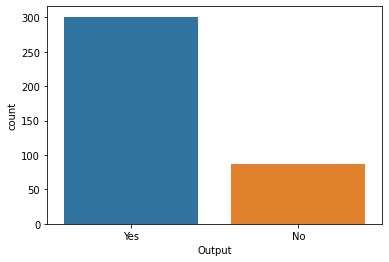

In [148]:
sns.countplot(fd_ori['Output']) # look target feature

#  KNN Algorithm  

In [149]:
# train_test_split by sklearn 
X=fd_dlvry[basic_f0]
y=fd_dlvry['Output']
# from imblearn.under_sampling import NearMiss
# nm=NearMiss()
# Make data balanced
from imblearn.over_sampling import RandomOverSampler
nm=RandomOverSampler(0.5)
X,y=nm.fit_sample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [150]:
fd_dlvry['Output'].value_counts()

1    301
0     87
Name: Output, dtype: int64

In [151]:
X.shape,y.shape

((451, 9), (451,))

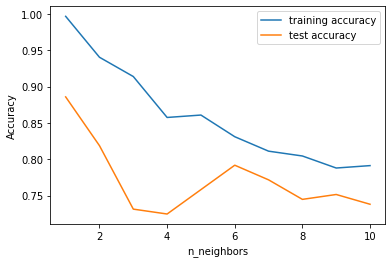

In [152]:
#select best knneighbour find 
plt.figure()
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for i in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

plt.show()

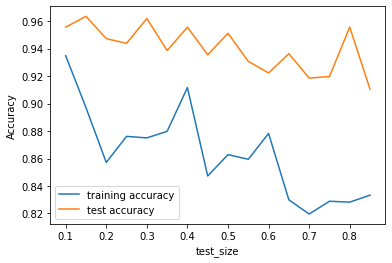

In [153]:
# appropriate test size find 
plt.figure()
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
test_size= numpy.arange(0.1, 0.9,0.05)
knn = KNeighborsClassifier(n_neighbors = 3,p=1)
for i in test_size:
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i)
        knn.fit(X_train, y_train)
        training_accuracy.append(knn.score(X_test, y_test))
        test_accuracy.append(knn.score(X_train, y_train))
  

    
plt.plot(test_size,training_accuracy,label="training accuracy")
plt.plot(test_size,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("test_size")
plt.legend()

plt.show()

In [154]:
#split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [155]:
# fit data and perform the knn algo
neigh = KNeighborsClassifier(n_neighbors=5,p=1)

knn=neigh.fit(X_train,y_train)

knn.score(X_test,y_test)


0.8938053097345132

In [156]:
#y_pred for confusion matrix
y_pred=knn.predict(X_test)

In [157]:
#confusion matrix 
cf_matrix_n=confusion_matrix(y_test, y_pred)
cf_matrix_n

array([[33,  8],
       [ 4, 68]], dtype=int64)

In [158]:
#classification report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.85        41
           1       0.89      0.94      0.92        72

    accuracy                           0.89       113
   macro avg       0.89      0.87      0.88       113
weighted avg       0.89      0.89      0.89       113



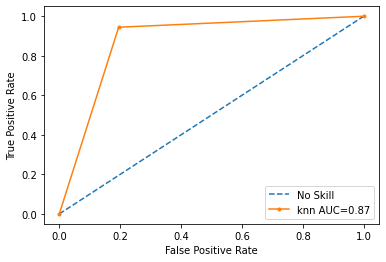

In [159]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_test, y_pred)
AUC=round(metrics.auc(fpr, tpr),2)

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label=f'knn AUC={AUC}')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()


<b> Conclusion: </b>

In [160]:
'''Here weighted avg f1-score is good and AUC is greate but problems here Knn is not learning something
knn just use more memory space for perform operation and mostly features are categorical so noise affect
on this algorithms
'''

'Here weighted avg f1-score is good and AUC is greate but problems here Knn is not learning something\nknn just use more memory space for perform operation and mostly features are categorical so noise affect\non this algorithms\n'

<b> Cross-Validation </b>

In [161]:
#without StratifiedKFold 
Knn=KNeighborsClassifier(n_neighbors=5,p=1)
score=cross_val_score(knn,X,y,cv=12)
print("mean:="+str(score.mean()),"std :"+str(score.std()))

mean:=0.8982930298719771 std :0.06312809261883197


In [162]:
#with StratifiedKFold 
import numpy as np
from sklearn.model_selection import StratifiedKFold 
skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
lst_accu_stratified = [] 

for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    knn.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(knn.score(x_test_fold, y_test_fold))
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.8947368421052632, 0.8157894736842105, 0.9473684210526315, 0.8421052631578947, 0.9473684210526315, 0.868421052631579, 0.8421052631578947, 0.7837837837837838, 0.8378378378378378, 0.9459459459459459, 0.8648648648648649, 0.918918918918919]

Maximum Accuracy That can be obtained from this model is: 94.73684210526315 %

Minimum Accuracy: 78.37837837837837 %

Average Accuracy That can be obtained from this model is:: 0.8757705073494547

Standard Deviation is: 0.052707080433850535


# method 2: feature selection using SelectKBest

In [163]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif

In [164]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [165]:
#select feature 
l1=['latitude','longitude','Pin code','Output','Reviews']
X=fd_dlvry[fd_dlvry.columns[~fd_dlvry.columns.isin(l1)]]
y=fd_dlvry['Output']
nm=RandomOverSampler(0.5)
X,y=nm.fit_sample(X,y)
X.shape

(451, 50)

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

Feature 0: 5.686458
Feature 1: 0.078317
Feature 2: 10.738655
Feature 3: 10.121110
Feature 4: 9.828667
Feature 5: 8.583840
Feature 6: 0.079938
Feature 7: 0.191377
Feature 8: 0.104406
Feature 9: 0.000391
Feature 10: 0.548476
Feature 11: 3.754604
Feature 12: 0.039712
Feature 13: 4.394215
Feature 14: 0.489768
Feature 15: 4.412182
Feature 16: 11.310603
Feature 17: 3.051233
Feature 18: 6.588744
Feature 19: 0.117668
Feature 20: 45.873295
Feature 21: 9.514518
Feature 22: 19.617432
Feature 23: 0.167675
Feature 24: 17.227774
Feature 25: 7.487221
Feature 26: 28.230113
Feature 27: 3.133473
Feature 28: 0.093110
Feature 29: 28.518917
Feature 30: 6.473625
Feature 31: 0.005520
Feature 32: 0.153093
Feature 33: 0.965501
Feature 34: 22.907221
Feature 35: 23.553319
Feature 36: 8.135990
Feature 37: 1.953752
Feature 38: 1.797243
Feature 39: 4.376294
Feature 40: 0.040225
Feature 41: 0.171271
Feature 42: 5.036219
Feature 43: 1.341093
Feature 44: 0.177838
Feature 45: 5.529824
Feature 46: 13.093645
Feature 47: 

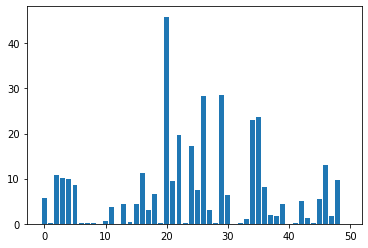

In [167]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
for i in range(len(fs.scores_)):
     print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)

plt.show()

In [168]:
# Extract feature 
basic_f1=[]
for i in range(len(fs.scores_)):
    if(fs.scores_[i]>10): # set Thresold
        print(X_test.columns[i])
        basic_f1.append(X_test.columns[i])

Marital Status
Occupation
Easy Payment option
Self Cooking
Late Delivery
Bad past experience
Unaffordable
Delay of delivery person picking up food
Order Time
Maximum wait time
Freshness 


# KNN Algorithm 

In [169]:
X=fd_dlvry[basic_f1]
y=fd_dlvry['Output']

nm=RandomOverSampler()
X,y=nm.fit_sample(X,y)

In [170]:
X.shape

(602, 11)

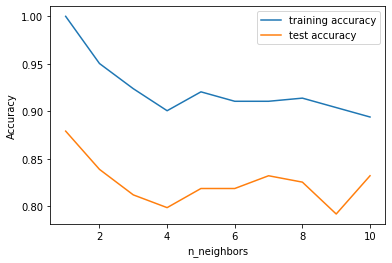

In [171]:
#neighbour find 
plt.figure()
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for i in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=i,p=1)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

plt.show()

In [172]:
# here some Extra work it's take long time to running
# plt.figure()
# training_accuracy = []
# test_accuracy = []
# # try n_neighbors from 1 to 10
# test_size= numpy.arange(0.1, 0.9,0.05)
# knn = KNeighborsClassifier(n_neighbors = 3)
# for i in test_size:
    
    
#     test_score = []
#     train_score=[]
#     for j in range(1,1000):
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i,random_state=6)
#         knn.fit(X_train, y_train)
#         test_score.append(knn.score(X_test, y_test))
#         train_score.append(knn.score(X_train, y_train))
  

       
#     training_accuracy.append(np.mean(train_score))
#     # record generalization accuracy
#     test_accuracy.append(np.mean(test_score))

# plt.plot(test_size,training_accuracy,label="training accuracy")
# plt.plot(test_size,test_accuracy,label="test accuracy")
# plt.ylabel("Accuracy")
# plt.xlabel("test_size")
# plt.legend()

# plt.show()

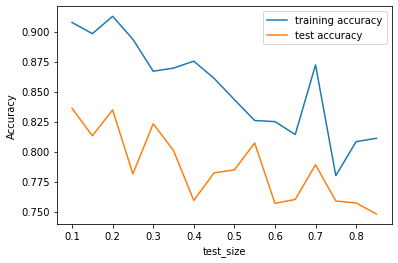

In [173]:
# appropriate test size find 
plt.figure()
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
test_size= numpy.arange(0.1, 0.9,0.05)
knn = KNeighborsClassifier(n_neighbors = 5)
for i in test_size:
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i)
        knn.fit(X_train, y_train)
        training_accuracy.append(knn.score(X_train,y_train))
        test_accuracy.append(knn.score(X_test,y_test))
  

    
plt.plot(test_size,training_accuracy,label="training accuracy")
plt.plot(test_size,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("test_size")
plt.legend()

plt.show()

In [174]:
#split data into test data and train data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

neigh = KNeighborsClassifier(n_neighbors=5)

knn=neigh.fit(X_train,y_train)

knn.score(X_test,y_test)

0.8008298755186722

In [175]:
y_pred=knn.predict(X_test)

In [176]:
#confusion matrix 
cf_matrix_n=confusion_matrix(y_test, y_pred)
cf_matrix_n

array([[105,  20],
       [ 28,  88]], dtype=int64)

In [177]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       125
           1       0.81      0.76      0.79       116

    accuracy                           0.80       241
   macro avg       0.80      0.80      0.80       241
weighted avg       0.80      0.80      0.80       241



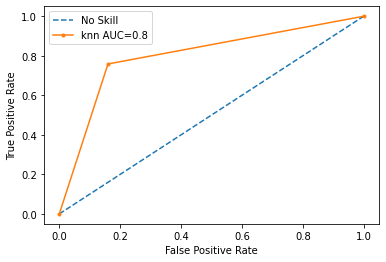

In [178]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_test, y_pred)
AUC=round(metrics.auc(fpr, tpr),2)

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label=f'knn AUC={AUC}')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()


<b> Conclusion:</b>

In [179]:
'''feature selection method affect our model,AUC decrease as compare to the first one'''

'feature selection method affect our model,AUC decrease as compare to the first one'

<b> Cross-Validation </b>

In [180]:
#without StratifiedKFold 
Knn=KNeighborsClassifier(n_neighbors=5,p=1)
score=cross_val_score(knn,X,y,cv=12)
print("mean:="+str(score.mean()),"std :"+str(score.std()))

mean:=0.8322222222222222 std :0.08091600937039224


In [181]:
#with StratifiedKFold 
import numpy as np
from sklearn.model_selection import StratifiedKFold 
skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
lst_accu_stratified = [] 

for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    knn.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(knn.score(x_test_fold, y_test_fold))
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.8627450980392157, 0.8235294117647058, 0.82, 0.84, 0.76, 0.86, 0.88, 0.72, 0.84, 0.86, 0.88, 0.88]

Maximum Accuracy That can be obtained from this model is: 88.0 %

Minimum Accuracy: 72.0 %

Average Accuracy That can be obtained from this model is:: 0.8355228758169936

Standard Deviation is: 0.04773894642587382


#  Logistics Regression


In [182]:
from sklearn.linear_model import LogisticRegression

In [183]:
# Here we are using  both method for feature selection  means we takes union both feature union

f_feature=list(set(basic_f0).union(set(basic_f1)))

In [184]:
f_feature

['Good Food quality',
 'Maximum wait time',
 'Freshness ',
 'Late Delivery',
 'Self Cooking',
 'Good Tracking system',
 'More Offers and Discount',
 'Time saving',
 'Delay of delivery person picking up food',
 'Ease and convenient',
 'More restaurant choices',
 'Bad past experience',
 'Unaffordable',
 'Marital Status',
 'Occupation',
 'Easy Payment option',
 'Order Time',
 'Age']

In [185]:
# Now we need to use some domain knowlegde for selecting feature 
'''Group 1: {'Ease and convenient','Easy Payment option'}
   Group 2 :{'Order Time','Time saving','Delay of delivery person picking up food','Maximum wait time'}'''
f_feature=['Ease and convenient','Self Cooking','Maximum wait time','More restaurant choices',
 'Unaffordable','More Offers and Discount','Good Food quality','Good Tracking system','Age','Bad past experience']

In [186]:
#select X,y 

X=fd_dlvry[f_feature]
y=fd_dlvry['Output']
from imblearn.under_sampling import NearMiss
# nm=NearMiss()
#try to making data balnaced 
nm=RandomOverSampler()
X,y=nm.fit_sample(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [187]:
X.shape

(602, 10)

In [188]:
f_feature

['Ease and convenient',
 'Self Cooking',
 'Maximum wait time',
 'More restaurant choices',
 'Unaffordable',
 'More Offers and Discount',
 'Good Food quality',
 'Good Tracking system',
 'Age',
 'Bad past experience']

In [189]:
Lg=LogisticRegression()

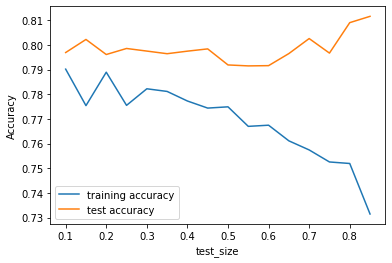

In [190]:
#
plt.figure()
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
test_size= numpy.arange(0.1, 0.9,0.05)

for i in test_size:
        t_s=[]
        tn_=[]
        for j in range(0,50):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i,random_state=np.random.randint(0,100))
            Lg.fit(X_train, y_train)
            
            t_s.append(Lg.score(X_test,y_test))
            tn_.append(Lg.score(X_train,y_train))
        training_accuracy.append(np.mean(t_s))
        test_accuracy.append(np.mean(tn_))


    
plt.plot(test_size,training_accuracy,label="training accuracy")
plt.plot(test_size,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("test_size")
plt.legend()

plt.show()




In [191]:
#data split into train and test size 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
Lg.fit(X_train,y_train)
Lg.score(X_test,y_test)

0.8011049723756906

In [192]:
y_pred=Lg.predict(X_test)

In [193]:
cf_matrix=confusion_matrix(y_test, y_pred)
cf_matrix

array([[73, 21],
       [15, 72]], dtype=int64)

In [194]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80        94
           1       0.77      0.83      0.80        87

    accuracy                           0.80       181
   macro avg       0.80      0.80      0.80       181
weighted avg       0.80      0.80      0.80       181



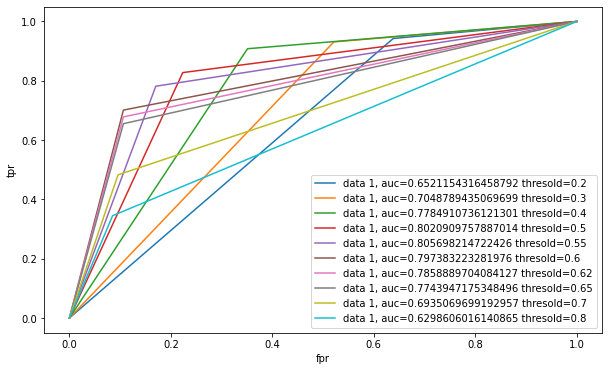

In [195]:
thresolds = [0.2,0.3,0.4,0.5,0.55,0.6,0.62,0.65,0.7,0.8]
plt.figure(figsize=(10,6))
for i in thresolds:
    y_pred_proba = (Lg.predict_proba(X_test)[:,1]>=i).astype(int)
    fpr, tpr, m= metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label=f"data 1, auc={auc} thresold={i}")
    plt.legend(loc=4)



plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [196]:
'''In Knn weighted avg f1-score is good and AUC is great but problems in Knn is not learning something
knn just use more memory space for perform operation and mostly features are categorical so noise affect
on this algorithms. Here we can see if we set thresold 0.65 in Logistics regression we get better model  and here algorithms 
something learn 
'''

'In Knn weighted avg f1-score is good and AUC is great but problems in Knn is not learning something\nknn just use more memory space for perform operation and mostly features are categorical so noise affect\non this algorithms. Here we can see if we set thresold 0.65 in Logistics regression we get better model  and here algorithms \nsomething learn \n'

<b> Cross-Validation </b>

In [197]:
score=cross_val_score(Lg,X,y,cv=10)
print('List of possible accuracy:', score) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(score)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(score)) 
print('\nStandard Deviation is:',np.std(score)) 

List of possible accuracy: [0.73770492 0.81967213 0.85       0.8        0.75       0.78333333
 0.81666667 0.78333333 0.7        0.76666667]

Maximum Accuracy That can be obtained from this model is: 85.0 %

Minimum Accuracy: 72.0 %

Average Accuracy That can be obtained from this model is:: 0.7807377049180328

Standard Deviation is: 0.04183509807253297


In [198]:
import numpy as np
from sklearn.model_selection import StratifiedKFold 
skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
lst_accu_stratified = [] 

for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    Lg.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(Lg.score(x_test_fold, y_test_fold))
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.7450980392156863, 0.7843137254901961, 0.86, 0.76, 0.74, 0.68, 0.84, 0.8, 0.82, 0.74, 0.8, 0.8]

Maximum Accuracy That can be obtained from this model is: 86.0 %

Minimum Accuracy: 68.0 %

Average Accuracy That can be obtained from this model is:: 0.7807843137254903

 Median Accuracy That can be obtained from this model is:: 0.7921568627450981

Standard Deviation is: 0.04798382828095543


In [199]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(Lg, X, y, cv=cv)

array([0.75690608, 0.79005525, 0.74585635, 0.8121547 , 0.82320442])

# DecisionTree (feature selection with both method)  

In [200]:
X=fd_dlvry[f_feature]
y=fd_dlvry['Output']
nm=RandomOverSampler() # try to making data balanced 
X,y=nm.fit_sample(X,y)
fd_dlvry['Output'].value_counts()

1    301
0     87
Name: Output, dtype: int64

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
clf=DecisionTreeClassifier(random_state=0,max_depth=6,min_samples_leaf=2,min_samples_split=4)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=4,
                       random_state=0)

In [202]:
clf.score(X_test,y_test)

0.9547738693467337

In [203]:
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0])

In [204]:
print(confusion_matrix(y_test,y_pred))

[[95  5]
 [ 4 95]]


In [205]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       100
           1       0.95      0.96      0.95        99

    accuracy                           0.95       199
   macro avg       0.95      0.95      0.95       199
weighted avg       0.95      0.95      0.95       199



In [206]:
cross_val_score(clf, X, y, cv=12)

array([0.88235294, 0.8627451 , 0.88      , 0.88      , 0.84      ,
       0.94      , 0.94      , 0.9       , 0.92      , 0.98      ,
       0.94      , 0.96      ])

In [207]:
lst_accu_stratified = [] 

for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    clf.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(Lg.score(x_test_fold, y_test_fold))
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.6666666666666666, 0.7843137254901961, 0.88, 0.78, 0.8, 0.76, 0.84, 0.9, 0.82, 0.7, 0.82, 0.88]

Maximum Accuracy That can be obtained from this model is: 90.0 %

Minimum Accuracy: 66.66666666666666 %

Average Accuracy That can be obtained from this model is:: 0.8025816993464053

 Median Accuracy That can be obtained from this model is:: 0.81

Standard Deviation is: 0.06778879880899202


In [208]:
import graphviz
import sklearn.tree as tree
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names='01',
                                filled=True)

# # Draw graph
graph = graphviz.Source(dot_data,format="png") 
graph.render('gini')
# graph

'gini.png'

# Feature selection with Decision Tree 

In [209]:
fd_dlvry=pd.read_csv('../../data/Banglore_food_delivery/onlinedeliverydata.csv')

fd_dlvry.drop(['Pin code','longitude','latitude','Reviews'],axis=1,inplace=True)

fd_dlvry['Output']=fd_dlvry['Output'].replace({'Yes':1,'No':0})

In [210]:
fd_ori=fd_dlvry.copy(deep=True)
df=pd.get_dummies(fd_dlvry)
df.shape

(388, 223)

In [211]:
l1=[]
for i in df.columns:
    if(i!='Output'):
        l1.append(i)
    

In [212]:
X=df[l1]
y=df['Output']
nm=RandomOverSampler()
X,y=nm.fit_sample(X,y)


In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
clf=DecisionTreeClassifier(random_state=0,max_depth=6,min_samples_leaf=2,min_samples_split=4)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=4,
                       random_state=0)

In [214]:
clf.score(X_test,y_test)

0.9698492462311558

In [215]:
clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05125913, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00108864,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00056018, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.50389636,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.1429309 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [216]:
def feature_extract(clf,l1):
    values = clf.feature_importances_
    importances = [(l1[i], values[i]) for i in range(len(l1))]
    importances.sort(reverse=True, key=lambda x:x[1])
    l3=[]
    for i in importances[:12]:
        l3.append(i[0])
    return l3

    

In [217]:
feature_extract(clf,l1)

['Ease and convenient_Disagree',
 'More restaurant choices_Disagree',
 'High Quality of package_Very Important',
 'Unaffordable_Agree',
 'Occupation_Student',
 'Unavailability_Disagree',
 'Bad past experience_Disagree',
 'Late Delivery_Disagree',
 'Missing item_Strongly agree',
 'High Quality of package_Important',
 'Delay of delivery person getting assigned_Disagree',
 'Late Delivery_Agree']

In [218]:
X=df[l1]
y=df['Output']
nm=RandomOverSampler()
X,y=nm.fit_sample(X,y)


In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
clf=DecisionTreeClassifier(random_state=0,max_depth=6,min_samples_leaf=2,min_samples_split=4)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=4,
                       random_state=0)

In [220]:
clf.score(X_test,y_test)

0.949748743718593

In [221]:
y_pred=clf.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0], dtype=int64)

In [222]:
print(confusion_matrix(y_test,y_pred))

[[92  6]
 [ 4 97]]


In [223]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        98
           1       0.94      0.96      0.95       101

    accuracy                           0.95       199
   macro avg       0.95      0.95      0.95       199
weighted avg       0.95      0.95      0.95       199



In [224]:
lst_accu_stratified = [] 
x=0
feature_common=pd.DataFrame()
for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    clf.fit(x_train_fold, y_train_fold)
    feature_common[x]=feature_extract(clf,l1)
    x+=1
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.9215686274509803, 0.9019607843137255, 0.96, 0.98, 0.92, 0.88, 0.9, 0.92, 0.92, 0.94, 0.98, 0.92]

Maximum Accuracy That can be obtained from this model is: 98.0 %

Minimum Accuracy: 88.0 %

Average Accuracy That can be obtained from this model is:: 0.9286274509803922

 Median Accuracy That can be obtained from this model is:: 0.92

Standard Deviation is: 0.029769501968775383


In [225]:
feature_common

,0,1,2,3,4,5,6,7,8,9,10,11
0,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree
1,Time saving_Disagree,Time saving_Disagree,Time saving_Disagree,Time saving_Disagree,Time saving_Disagree,Time saving_Disagree,Time saving_Disagree,Time saving_Disagree,Time saving_Disagree,Time saving_Disagree,Time saving_Disagree,Time saving_Disagree
2,Unaffordable_Strongly agree,More restaurant choices_Disagree,Unaffordable_Agree,Missing item_Neutral,Politeness_Very Important,Unaffordable_Agree,More restaurant choices_Disagree,Missing item_Neutral,Unaffordable_Agree,Missing item_Neutral,More restaurant choices_Disagree,Unaffordable_Strongly agree
3,Unaffordable_Agree,Missing item_Neutral,Perference(P2)_ Sweets,Unaffordable_Agree,More restaurant choices_Disagree,Unaffordable_Strongly agree,Unaffordable_Agree,More restaurant choices_Disagree,Unaffordable_Strongly agree,More restaurant choices_Disagree,Missing item_Neutral,Occupation_Employee
4,Occupation_Employee,Occupation_Employee,More restaurant choices_Disagree,Perference(P2)_ Sweets,Missing item_Neutral,Occupation_Employee,Perference(P2)_ Sweets,Unaffordable_Agree,Occupation_Employee,Unaffordable_Agree,Politeness_Very Important,Unaffordable_Agree
5,Good Food quality_Neutral,Unaffordable_Agree,Missing item_Neutral,More restaurant choices_Disagree,High Quality of package_Important,Monthly Income_10001 to 25000,Missing item_Neutral,Occupation_Employee,Educational Qualifications_Post Graduate,Occupation_Student,High Quality of package_Important,Educational Qualifications_Post Graduate
6,Health Concern_Agree,Educational Qualifications_Post Graduate,Good Food quality_Neutral,High Quality of package_Important,Educational Qualifications_Post Graduate,Good Food quality_Neutral,Good Food quality_Neutral,Good Food quality_Neutral,Delay of delivery person picking up food_Agree,Perference(P2)_ Sweets,Good Food quality_Neutral,Delay of delivery person picking up food_Agree
7,Time saving_Strongly agree,Perference(P2)_ Sweets,High Quality of package_Important,Good Food quality_Neutral,Unaffordable_Strongly disagree,Delay of delivery person picking up food_Agree,High Quality of package_Important,Perference(P2)_ Sweets,Monthly Income_10001 to 25000,Educational Qualifications_Post Graduate,Unaffordable_Strongly disagree,Long delivery time_Disagree
8,Missing item_Strongly agree,Delay of delivery person getting assigned_Agree,Wrong order delivered_Strongly disagree,Late Delivery_Disagree,Late Delivery_Disagree,Educational Qualifications_Post Graduate,Educational Qualifications_Post Graduate,Educational Qualifications_Graduate,Order placed by mistake_Neutral,Missing item_Strongly agree,Influence of time_No,Missing item_Strongly agree
9,Educational Qualifications_Post Graduate,Late Delivery_Disagree,Late Delivery_Disagree,Educational Qualifications_Post Graduate,Influence of time_No,Google Maps Accuracy_Strongly Agree,Maximum wait time_45 minutes,Late Delivery_Disagree,Missing item_Strongly agree,Order placed by mistake_Neutral,Late Delivery_Disagree,Google Maps Accuracy_Strongly Agree


In [226]:
l2=feature_extract(clf,l1)

In [227]:
relation_between_feature=pd.DataFrame(index=l2)

In [228]:
relation_between_feature.head()

""
Ease and convenient_Disagree
Time saving_Disagree
Unaffordable_Strongly agree
Occupation_Employee
Unaffordable_Agree


In [229]:
X[l2]

,Ease and convenient_Disagree,Time saving_Disagree,Unaffordable_Strongly agree,Occupation_Employee,Unaffordable_Agree,Educational Qualifications_Post Graduate,Delay of delivery person picking up food_Agree,Long delivery time_Disagree,Missing item_Strongly agree,Google Maps Accuracy_Strongly Agree,Self Cooking_Strongly agree,Order placed by mistake_Neutral
0,0,0,0,0,0,1,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,1,0
2,0,0,0,0,1,1,1,0,0,1,0,1
3,0,0,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
597,1,0,0,0,0,1,1,1,0,0,0,0
598,0,1,0,0,1,0,1,0,0,0,0,0
599,0,0,0,1,1,1,0,0,0,1,0,1
600,0,0,0,0,0,1,0,1,0,1,1,0


In [230]:

for i in l2:
    l1=[]
    for j in l2:
        df_t=pd.crosstab(X[j],X[i])
        stat, p, dof, expected = st.chi2_contingency(df_t,correction=True)
        t=min(df_t.shape)-1
        deno=sum(df_t.sum())
        x=np.sqrt(stat / deno)
        l1.append(x)
    relation_between_feature[i]=l1
    



        


In [232]:
relation_between_feature

,Ease and convenient_Disagree,Time saving_Disagree,Unaffordable_Strongly agree,Occupation_Employee,Unaffordable_Agree,Educational Qualifications_Post Graduate,Delay of delivery person picking up food_Agree,Long delivery time_Disagree,Missing item_Strongly agree,Google Maps Accuracy_Strongly Agree,Self Cooking_Strongly agree,Order placed by mistake_Neutral
Ease and convenient_Disagree,0.996176,0.553332,0.043264,0.135874,0.250784,0.156718,0.176301,0.344958,0.035412,0.022203,0.136623,0.181046
Time saving_Disagree,0.553332,0.996247,0.066792,0.086750,0.258953,0.225717,0.224560,0.049332,0.057768,0.023082,0.053757,0.158073
Unaffordable_Strongly agree,0.043264,0.066792,0.990744,0.021188,0.183528,0.069091,0.090973,0.067241,0.110316,0.015200,0.133901,0.088189
Occupation_Employee,0.135874,0.086750,0.021188,0.996375,0.023282,0.178119,0.055138,0.097905,0.068761,0.072076,0.132178,0.125028
Unaffordable_Agree,0.250784,0.258953,0.183528,0.023282,0.995520,0.120789,0.013124,0.037480,0.075683,0.004110,0.073861,0.072507
Educational Qualifications_Post Graduate,0.156718,0.225717,0.069091,0.178119,0.120789,0.996510,0.035633,0.120603,0.155583,0.080964,0.089624,0.228314
Delay of delivery person picking up food_Agree,0.176301,0.224560,0.090973,0.055138,0.013124,0.035633,0.996605,0.126711,0.050491,0.046547,0.105737,0.018898
Long delivery time_Disagree,0.344958,0.049332,0.067241,0.097905,0.037480,0.120603,0.126711,0.996284,0.118089,0.112984,0.021907,0.131942
Missing item_Strongly agree,0.035412,0.057768,0.110316,0.068761,0.075683,0.155583,0.050491,0.118089,0.994052,0.065694,0.024884,0.063968
Google Maps Accuracy_Strongly Agree,0.022203,0.023082,0.015200,0.072076,0.004110,0.080964,0.046547,0.112984,0.065694,0.996074,0.099419,0.033049


In [233]:
fd_dlvry.shape

(388, 51)

In [235]:
relation_between_feature.style.apply(lambda x: ["background: red" if v>0.25 and v<0.99 else "" for v in x], axis = 1)

,Ease and convenient_Disagree,Time saving_Disagree,Unaffordable_Strongly agree,Occupation_Employee,Unaffordable_Agree,Educational Qualifications_Post Graduate,Delay of delivery person picking up food_Agree,Long delivery time_Disagree,Missing item_Strongly agree,Google Maps Accuracy_Strongly Agree,Self Cooking_Strongly agree,Order placed by mistake_Neutral
Ease and convenient_Disagree,0.996176,0.553332,0.043264,0.135874,0.250784,0.156718,0.176301,0.344958,0.035412,0.022203,0.136623,0.181046
Time saving_Disagree,0.553332,0.996247,0.066792,0.086750,0.258953,0.225717,0.224560,0.049332,0.057768,0.023082,0.053757,0.158073
Unaffordable_Strongly agree,0.043264,0.066792,0.990744,0.021188,0.183528,0.069091,0.090973,0.067241,0.110316,0.015200,0.133901,0.088189
Occupation_Employee,0.135874,0.086750,0.021188,0.996375,0.023282,0.178119,0.055138,0.097905,0.068761,0.072076,0.132178,0.125028
Unaffordable_Agree,0.250784,0.258953,0.183528,0.023282,0.995520,0.120789,0.013124,0.037480,0.075683,0.004110,0.073861,0.072507
Educational Qualifications_Post Graduate,0.156718,0.225717,0.069091,0.178119,0.120789,0.996510,0.035633,0.120603,0.155583,0.080964,0.089624,0.228314
Delay of delivery person picking up food_Agree,0.176301,0.224560,0.090973,0.055138,0.013124,0.035633,0.996605,0.126711,0.050491,0.046547,0.105737,0.018898
Long delivery time_Disagree,0.344958,0.049332,0.067241,0.097905,0.037480,0.120603,0.126711,0.996284,0.118089,0.112984,0.021907,0.131942
Missing item_Strongly agree,0.035412,0.057768,0.110316,0.068761,0.075683,0.155583,0.050491,0.118089,0.994052,0.065694,0.024884,0.063968
Google Maps Accuracy_Strongly Agree,0.022203,0.023082,0.015200,0.072076,0.004110,0.080964,0.046547,0.112984,0.065694,0.996074,0.099419,0.033049


In [236]:
multicolinear_feature=["Perference(P2)_ Sweets","Maximum wait time_15 minutes","More restaurant choices_Disagree"]

In [237]:
final_feature=list(relation_between_feature.columns)

In [238]:
final_feature

['Ease and convenient_Disagree',
 'Time saving_Disagree',
 'Unaffordable_Strongly agree',
 'Occupation_Employee',
 'Unaffordable_Agree',
 'Educational Qualifications_Post Graduate',
 'Delay of delivery person picking up food_Agree',
 'Long delivery time_Disagree',
 'Missing item_Strongly agree',
 'Google Maps Accuracy_Strongly Agree',
 'Self Cooking_Strongly agree',
 'Order placed by mistake_Neutral']

In [239]:
set1 = set(final_feature)
set2 = set(multicolinear_feature)
final_feature = list(set1 - set2)

In [240]:
final_feature

['Occupation_Employee',
 'Educational Qualifications_Post Graduate',
 'Google Maps Accuracy_Strongly Agree',
 'Ease and convenient_Disagree',
 'Delay of delivery person picking up food_Agree',
 'Self Cooking_Strongly agree',
 'Long delivery time_Disagree',
 'Unaffordable_Agree',
 'Missing item_Strongly agree',
 'Order placed by mistake_Neutral',
 'Unaffordable_Strongly agree',
 'Time saving_Disagree']

In [241]:

import graphviz
import sklearn.tree as tree
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names='01',
                                filled=True)

# # Draw graph
graph = graphviz.Source(dot_data,format="png") 
graph.render('fgini')
# graph

'fgini.png'

# Decesion Tree model

In [344]:
fd_dlvry=pd.read_csv('../../data/Banglore_food_delivery/onlinedeliverydata.csv')

fd_dlvry.drop(['Pin code','longitude','latitude','Reviews'],axis=1,inplace=True)

fd_dlvry['Output']=fd_dlvry['Output'].replace({'Yes':1,'No':0})

In [345]:
fd_dlvry.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Medium (P1),Medium (P2),Meal(P1),...,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output
0,20,Female,Single,Student,No Income,Post Graduate,4,Food delivery apps,Web browser,Breakfast,...,Yes,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,1
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,Food delivery apps,Web browser,Snacks,...,Yes,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,1
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,Food delivery apps,Direct call,Lunch,...,Yes,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,1
3,22,Female,Single,Student,No Income,Graduate,6,Food delivery apps,Walk-in,Snacks,...,Yes,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,1
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,Walk-in,Direct call,Lunch,...,Yes,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,1


In [346]:
fd_ori=fd_dlvry.copy(deep=True)
df=pd.get_dummies(fd_dlvry)
df.shape

(388, 223)

In [347]:
final_feature=['Unaffordable_Agree',
 'Delay of delivery person getting assigned_Strongly agree',
 'Long delivery time_Agree',
 'Wrong order delivered_Strongly disagree',
 'Missing item_Neutral',
 'Unavailability_Disagree',
 'Occupation_Student',
 'Ease and convenient_Disagree',
 'Late Delivery_Disagree']

In [348]:
final_feature

['Unaffordable_Agree',
 'Delay of delivery person getting assigned_Strongly agree',
 'Long delivery time_Agree',
 'Wrong order delivered_Strongly disagree',
 'Missing item_Neutral',
 'Unavailability_Disagree',
 'Occupation_Student',
 'Ease and convenient_Disagree',
 'Late Delivery_Disagree']

In [349]:
X=df[final_feature]
y=df['Output']
nm=RandomOverSampler()
X,y=nm.fit_sample(X,y)


In [350]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
clf=DecisionTreeClassifier(random_state=0,max_depth=6,min_samples_leaf=2,min_samples_split=4)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=4,
                       random_state=0)

In [351]:
clf.score(X_test,y_test)

0.8693467336683417

In [352]:
y_pred=clf.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0], dtype=int64)

In [251]:
print(confusion_matrix(y_test,y_pred))

[[92 12]
 [ 9 86]]


In [254]:
lst_accu_stratified = [] 
x=0
x=0
feature_common=pd.DataFrame()
skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    clf.fit(x_train_fold, y_train_fold)
    
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.8823529411764706, 0.7843137254901961, 0.88, 0.9, 0.92, 0.86, 0.8, 0.9, 0.84, 0.9, 0.9, 0.88]

Maximum Accuracy That can be obtained from this model is: 92.0 %

Minimum Accuracy: 78.43137254901961 %

Average Accuracy That can be obtained from this model is:: 0.8705555555555556

 Median Accuracy That can be obtained from this model is:: 0.8811764705882352

Standard Deviation is: 0.04050825953985097


In [ ]:
list_1=[1,0,1,0,1,0,0,0,0]
pre=np.array(list_1).reshape(1,-1)
nk=dict(zip(X_test.columns,list_1))
nk


In [ ]:
# import graphviz
# import sklearn.tree as tree
# # DOT data
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                                 feature_names=X_test.columns,  
#                                 class_names='01',
#                                 filled=True)

# # # Draw graph
# graph = graphviz.Source(dot_data,format="png") 
# graph.render('fgini')
# # graph

In [ ]:
clf.predict(pre)

In [ ]:
nk.keys()

In [ ]:
fd_dlvry['Missing item'].unique()

# Random forest


## Feature selection by Random forest

In [299]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(max_depth=6,min_samples_split=4)

In [300]:
from sklearn.feature_selection import SelectFromModel

In [355]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

nm=RandomOverSampler()
X,y=nm.fit_sample(X,y)

In [356]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
clf=RandomForestClassifier(max_depth=5,min_samples_split=2)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [357]:
lst_accu_stratified = [] 
x=0
feature_common=pd.DataFrame()
skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    clf.fit(x_train_fold, y_train_fold)
    feature_common[x]=feature_extract(clf,X_train.columns)
    x+=1
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
   
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.9722222222222222, 0.8888888888888888, 0.9444444444444444, 1.0, 0.9444444444444444, 0.8611111111111112, 0.9166666666666666, 0.9722222222222222, 1.0, 0.9142857142857143, 0.8285714285714286, 0.9714285714285714]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 82.85714285714286 %

Average Accuracy That can be obtained from this model is:: 0.9345238095238096

 Median Accuracy That can be obtained from this model is:: 0.9444444444444444

Standard Deviation is: 0.05196291824718776


In [358]:
feature_common

,0,1,2,3,4,5,6,7,8,9,10,11
0,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important,Good Quantity_Important
1,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important,Good Taste _Very Important
2,Temperature_Very Important,Temperature_Very Important,Temperature_Very Important,Temperature_Very Important,Temperature_Very Important,Good Taste _Important,Temperature_Very Important,Freshness _Very Important,Temperature_Very Important,Good Taste _Important,Freshness _Very Important,Temperature_Very Important
3,Good Taste _Important,Freshness _Very Important,Freshness _Very Important,Good Taste _Important,Good Taste _Important,Temperature_Very Important,Good Taste _Important,Temperature_Very Important,Freshness _Very Important,Temperature_Very Important,Good Taste _Important,Freshness _Very Important
4,Freshness _Very Important,Good Taste _Important,Good Taste _Important,Freshness _Very Important,Freshness _Very Important,Freshness _Very Important,Freshness _Very Important,Good Taste _Important,Good Taste _Important,Freshness _Very Important,Temperature_Very Important,Good Taste _Important
5,Good Taste _Moderately Important,Good Taste _Moderately Important,Good Quantity_Moderately Important,Good Taste _Moderately Important,Good Taste _Moderately Important,Good Taste _Moderately Important,Good Taste _Moderately Important,Good Taste _Moderately Important,Good Quantity_Moderately Important,Good Taste _Moderately Important,Good Taste _Moderately Important,Good Taste _Moderately Important
6,Good Quantity_Moderately Important,Good Quantity_Moderately Important,Good Taste _Moderately Important,Good Quantity_Moderately Important,Good Quantity_Moderately Important,Good Quantity_Moderately Important,Good Quantity_Slightly Important,Good Quantity_Moderately Important,Good Taste _Moderately Important,Good Quantity_Moderately Important,Good Quantity_Moderately Important,Good Quantity_Moderately Important
7,Good Quantity_Slightly Important,Good Quantity_Slightly Important,Freshness _Important,Temperature_Important,Freshness _Important,Good Quantity_Slightly Important,Freshness _Important,Good Quantity_Slightly Important,Freshness _Important,Freshness _Important,Freshness _Important,Temperature_Slightly Important
8,Freshness _Important,Temperature_Slightly Important,Temperature_Important,Good Quantity_Slightly Important,Temperature_Important,Freshness _Important,Good Quantity_Moderately Important,Educational Qualifications_Post Graduate,Temperature_Important,High Quality of package_Very Important,Temperature_Slightly Important,Age
9,Temperature_Important,Freshness _Important,Good Quantity_Slightly Important,Age,Good Quantity_Slightly Important,Educational Qualifications_Post Graduate,Temperature_Important,Freshness _Important,Good Quantity_Slightly Important,Good Quantity_Slightly Important,Temperature_Important,Temperature_Important


In [359]:
feature_common[2]

0                      Good Quantity_Important
1                   Good Taste _Very Important
2                   Temperature_Very Important
3                    Freshness _Very Important
4                        Good Taste _Important
5           Good Quantity_Moderately Important
6             Good Taste _Moderately Important
7                         Freshness _Important
8                        Temperature_Important
9             Good Quantity_Slightly Important
10                                         Age
11    Educational Qualifications_Post Graduate
Name: 2, dtype: object

## Build Model

In [360]:
X=df[feature_common[2]]
y=df.iloc[:,-1]

In [361]:

nm=RandomOverSampler()
X,y=nm.fit_sample(X,y)

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
clf=RandomForestClassifier(max_depth=3,min_samples_split=4)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_split=4)

In [364]:
clf.score(X_test,y_test)

0.8802816901408451

In [365]:
y_pred=clf.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1], dtype=uint8)

In [366]:
print(confusion_matrix(y_test,y_pred))

[[69  5]
 [12 56]]


In [367]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        74
           1       0.92      0.82      0.87        68

    accuracy                           0.88       142
   macro avg       0.88      0.88      0.88       142
weighted avg       0.88      0.88      0.88       142



In [368]:
lst_accu_stratified = [] 
x=0

skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    clf.fit(x_train_fold, y_train_fold)
    
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
   
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [1.0, 0.9444444444444444, 1.0, 1.0, 0.9722222222222222, 1.0, 1.0, 0.9444444444444444, 0.9714285714285714, 0.9714285714285714, 0.8571428571428571, 0.9714285714285714]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 85.71428571428571 %

Average Accuracy That can be obtained from this model is:: 0.969378306878307

 Median Accuracy That can be obtained from this model is:: 0.9718253968253968

Standard Deviation is: 0.03931637723425776


## Using method 1 feature through build model

In [395]:
f_feature

['Ease and convenient',
 'Self Cooking',
 'Maximum wait time',
 'More restaurant choices',
 'Unaffordable',
 'More Offers and Discount',
 'Good Food quality',
 'Good Tracking system',
 'Age',
 'Bad past experience']

In [396]:
X=fd_dlvry[f_feature]
y=fd_dlvry.iloc[:,-1]

nm=RandomOverSampler()
X,y=nm.fit_sample(X,y)

In [397]:
import  datacleaner as dc # pip install datacleaner

dc.autoclean(fd_dlvry).head() 

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Medium (P1),Medium (P2),Meal(P1),...,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output
0,20,0,2,3,4,2,4,1,2,0,...,2,1,1,1,1,1,1,1,1,1
1,24,0,2,3,2,0,3,1,2,3,...,2,4,4,4,4,4,4,4,4,1
2,22,1,2,3,2,2,3,1,0,2,...,2,0,4,1,4,4,0,4,1,1
3,22,0,2,3,4,0,6,1,1,3,...,2,4,0,1,4,4,4,4,0,1
4,22,1,2,3,2,2,4,2,0,2,...,2,0,0,1,0,0,0,4,4,1


In [398]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
clf=RandomForestClassifier(max_depth=3,min_samples_split=4)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_split=4)

In [399]:
clf.score(X_test,y_test)

0.8391959798994975

In [400]:
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1], dtype=int64)

In [401]:
print(confusion_matrix(y_test,y_pred))

[[80 22]
 [10 87]]


In [402]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       102
           1       0.80      0.90      0.84        97

    accuracy                           0.84       199
   macro avg       0.84      0.84      0.84       199
weighted avg       0.84      0.84      0.84       199



In [403]:
lst_accu_stratified = [] 
x=0

skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    clf.fit(x_train_fold, y_train_fold)
    
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
   
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.8431372549019608, 0.8823529411764706, 0.82, 0.96, 0.92, 0.88, 0.86, 0.88, 0.84, 0.86, 0.92, 0.96]

Maximum Accuracy That can be obtained from this model is: 96.0 %

Minimum Accuracy: 82.0 %

Average Accuracy That can be obtained from this model is:: 0.8854575163398692

 Median Accuracy That can be obtained from this model is:: 0.88

Standard Deviation is: 0.04378639866170741
